LOGISTIC REGRESSION
1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 





In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('Titanic_train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv('Titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
age = train_data['Age'].mean()

In [9]:
age

29.69911764705882

In [10]:
train_data['Age'].fillna(29,inplace=True)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [13]:
train_data['Cabin'].fillna('G6',inplace=True)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
data = train_data.copy()

In [16]:
data.drop(columns=['Name','Ticket'],inplace=True)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,G6,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,G6,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,G6,S


## visualize data

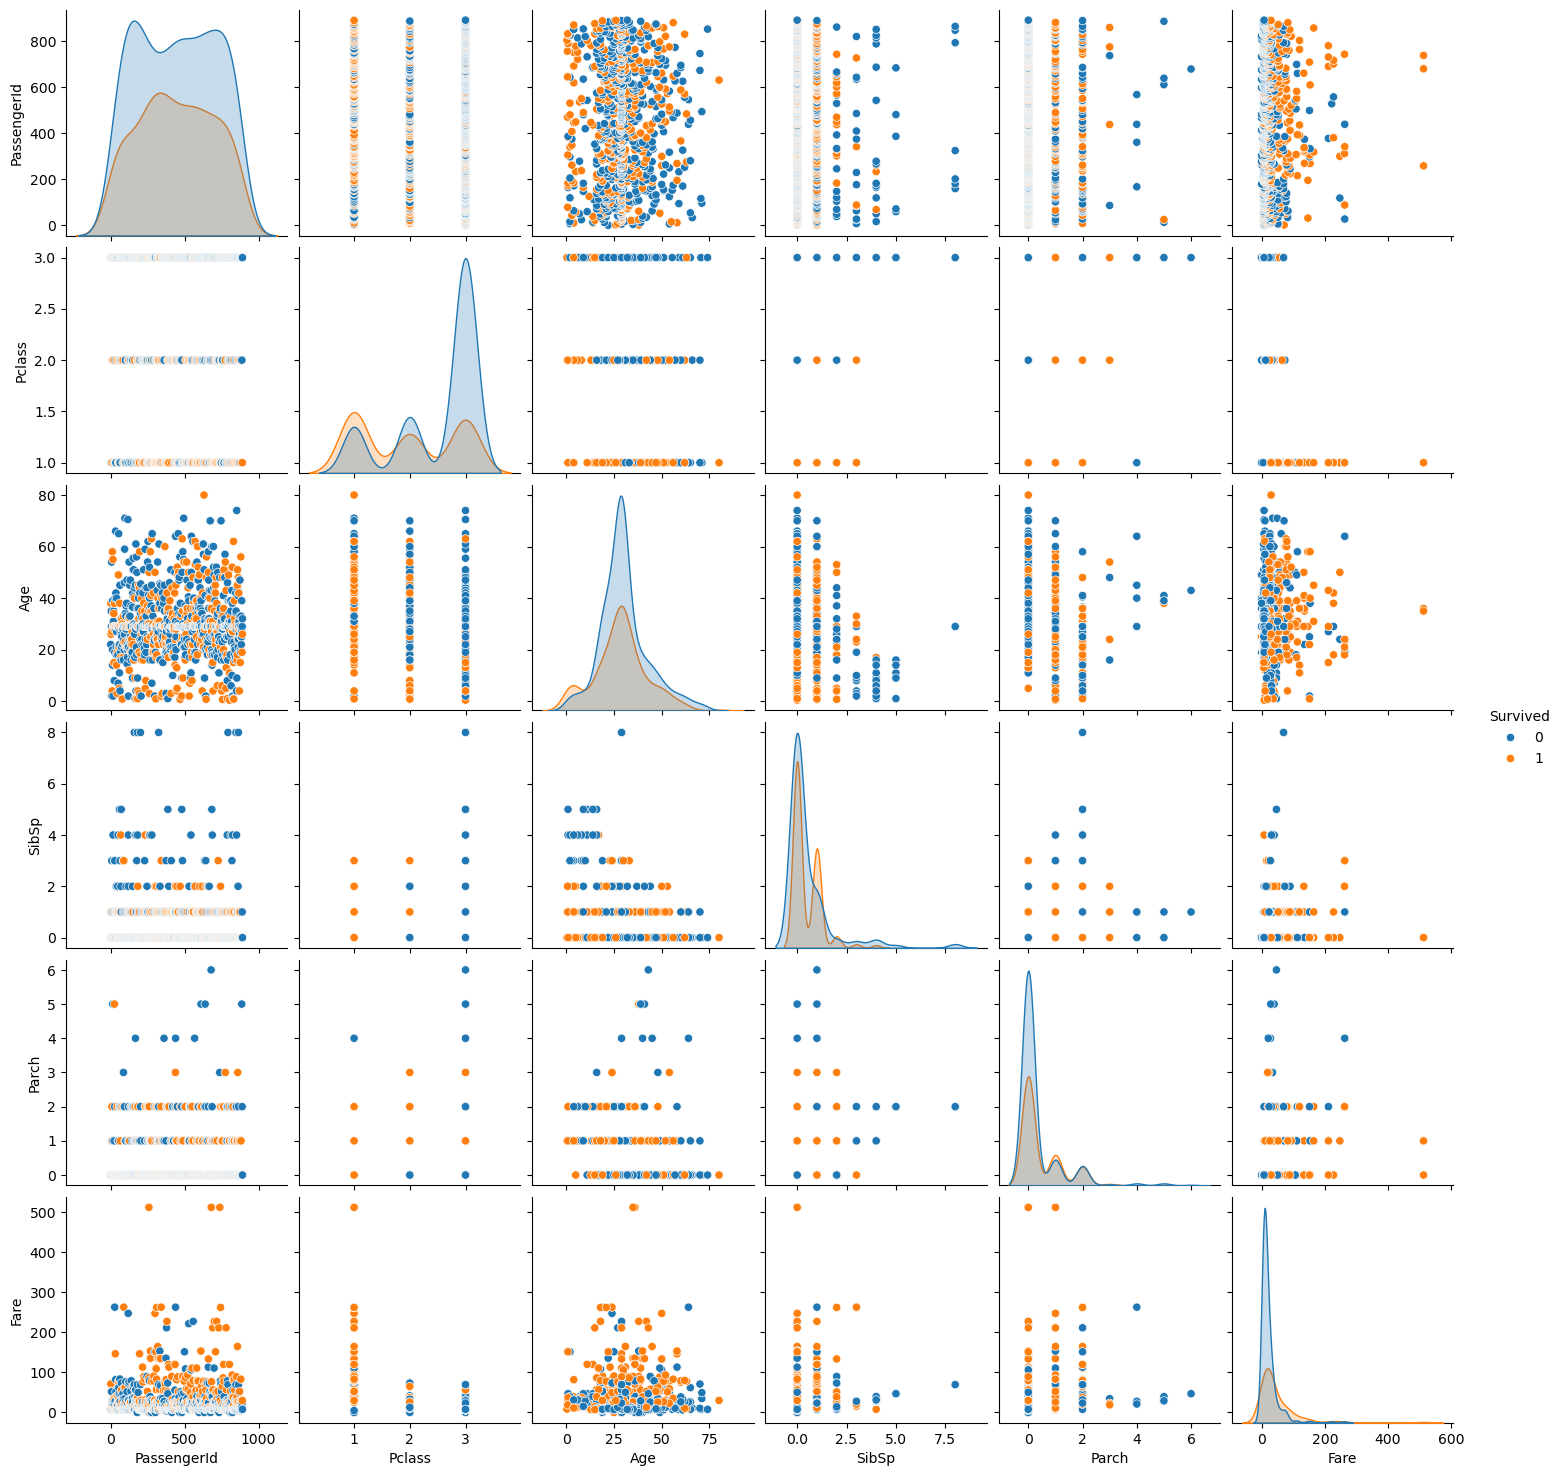

In [18]:
sns.pairplot(data,hue='Survived')
plt.show()

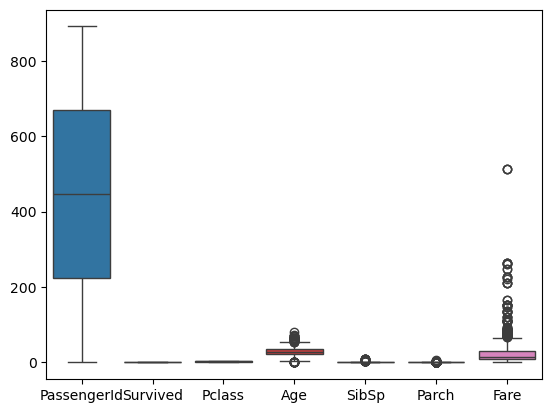

In [19]:
sns.boxplot(data)
plt.show()

In [20]:
data['Fare'].max()

512.3292

In [21]:
data[data['Fare']==512.3292] 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,259,1,1,female,35.0,0,0,512.3292,G6,C
679,680,1,1,male,36.0,0,1,512.3292,B51 B53 B55,C
737,738,1,1,male,35.0,0,0,512.3292,B101,C


In [22]:
data.drop(index=[258,679,737], axis=0,inplace=True)

In [23]:
data.reset_index(inplace=True)

In [24]:
data.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
data.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,male,22.0,1,0,7.2500,G6,S
1,1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,2,3,1,3,female,26.0,0,0,7.9250,G6,S
3,3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,4,5,0,3,male,35.0,0,0,8.0500,G6,S


In [26]:
data.drop(columns=['index'],inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Sex          888 non-null    object 
 4   Age          888 non-null    float64
 5   SibSp        888 non-null    int64  
 6   Parch        888 non-null    int64  
 7   Fare         888 non-null    float64
 8   Cabin        888 non-null    object 
 9   Embarked     886 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.5+ KB


In [28]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,G6,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,G6,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,G6,S


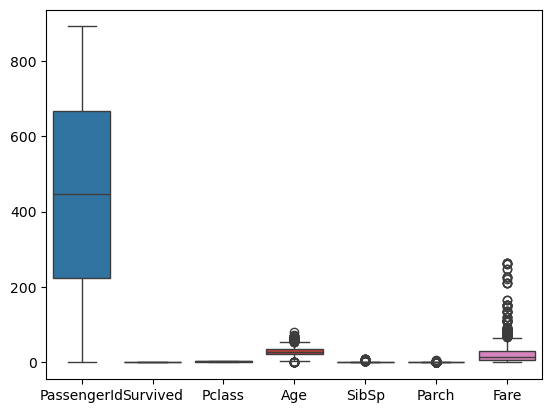

In [29]:
sns.boxplot(data)
plt.show()

In [30]:
num_data = data.select_dtypes(np.number)

In [31]:
correlation = num_data.corr()

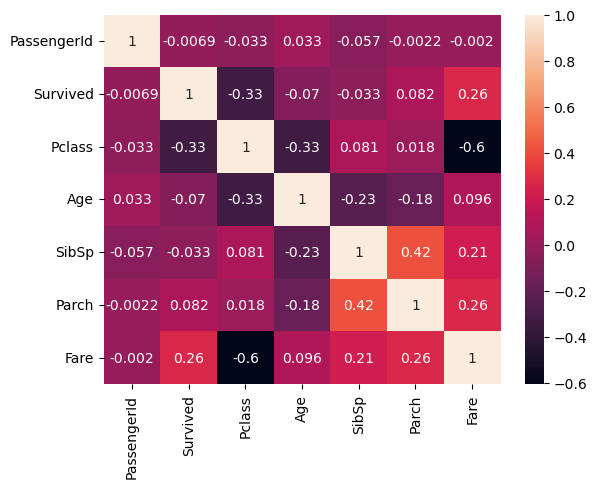

In [32]:
sns.heatmap(correlation,annot=True)
plt.show()

## encode categorical value

In [33]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
883    S
884    S
885    S
886    C
887    Q
Name: Embarked, Length: 888, dtype: object

In [36]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [37]:
data['Embarked'].fillna('S',inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Sex          888 non-null    object 
 4   Age          888 non-null    float64
 5   SibSp        888 non-null    int64  
 6   Parch        888 non-null    int64  
 7   Fare         888 non-null    float64
 8   Cabin        888 non-null    object 
 9   Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.5+ KB


In [39]:
cat_data = data.select_dtypes(np.object_)

In [40]:
cat_data.head()

,Sex,Cabin,Embarked
0,male,G6,S
1,female,C85,C
2,female,G6,S
3,female,C123,S
4,male,G6,S


In [41]:
data['Sex'] = pd.get_dummies(data['Sex'],drop_first=True,dtype='int')

In [42]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,G6,S
1,2,1,1,0,38.0,1,0,71.2833,C85,C
2,3,1,3,0,26.0,0,0,7.9250,G6,S
3,4,1,1,0,35.0,1,0,53.1000,C123,S
4,5,0,3,1,35.0,0,0,8.0500,G6,S


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Sex          888 non-null    int32  
 4   Age          888 non-null    float64
 5   SibSp        888 non-null    int64  
 6   Parch        888 non-null    int64  
 7   Fare         888 non-null    float64
 8   Cabin        888 non-null    object 
 9   Embarked     888 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 66.0+ KB


In [44]:
lab_enc=LabelEncoder()

In [45]:
data['Embarked']=lab_enc.fit_transform(data[['Embarked']])

In [46]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,G6,2
1,2,1,1,0,38.0,1,0,71.2833,C85,0
2,3,1,3,0,26.0,0,0,7.9250,G6,2
3,4,1,1,0,35.0,1,0,53.1000,C123,2
4,5,0,3,1,35.0,0,0,8.0500,G6,2
...,...,...,...,...,...,...,...,...,...,...
883,887,0,2,1,27.0,0,0,13.0000,G6,2
884,888,1,1,0,19.0,0,0,30.0000,B42,2
885,889,0,3,0,29.0,1,2,23.4500,G6,2
886,890,1,1,1,26.0,0,0,30.0000,C148,0


In [47]:
data['Cabin']=lab_enc.fit_transform(data[['Cabin']])

In [48]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,144,2
1,2,1,1,0,38.0,1,0,71.2833,80,0
2,3,1,3,0,26.0,0,0,7.9250,144,2
3,4,1,1,0,35.0,1,0,53.1000,54,2
4,5,0,3,1,35.0,0,0,8.0500,144,2
...,...,...,...,...,...,...,...,...,...,...
883,887,0,2,1,27.0,0,0,13.0000,144,2
884,888,1,1,0,19.0,0,0,30.0000,29,2
885,889,0,3,0,29.0,1,2,23.4500,144,2
886,890,1,1,1,26.0,0,0,30.0000,59,0


## split data into train and test

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
features = data.drop(columns=['Survived'])
target= data['Survived']

In [51]:
features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,144,2
1,2,1,0,38.0,1,0,71.2833,80,0
2,3,3,0,26.0,0,0,7.9250,144,2
3,4,1,0,35.0,1,0,53.1000,54,2
4,5,3,1,35.0,0,0,8.0500,144,2
...,...,...,...,...,...,...,...,...,...
883,887,2,1,27.0,0,0,13.0000,144,2
884,888,1,0,19.0,0,0,30.0000,29,2
885,889,3,0,29.0,1,2,23.4500,144,2
886,890,1,1,26.0,0,0,30.0000,59,0


In [52]:
target

0      0
1      1
2      1
3      1
4      0
      ..
883    0
884    1
885    0
886    1
887    0
Name: Survived, Length: 888, dtype: int64

In [53]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.5,random_state=50)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(444, 9)
(444, 9)
(444,)
(444,)


## Build model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score

In [56]:
log_model = LogisticRegression()

In [57]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred = log_model.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

# Evaluate the model

In [59]:
print('r2_score:')
(r2_score(y_test,y_pred))

r2_score:


0.19354566190757794

In [60]:
print("\nAccuracy Scores:")
accuracy_score(y_test,y_pred)


Accuracy Scores:


0.8063063063063063

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       266
           1       0.83      0.65      0.73       178

    accuracy                           0.81       444
   macro avg       0.81      0.78      0.79       444
weighted avg       0.81      0.81      0.80       444



In [63]:
ts_proba=log_model.predict_proba(x_test)[:, 1] 

In [64]:
ts_proba[:10]

array([0.11717879, 0.23196538, 0.54153541, 0.68184385, 0.63201739,
       0.75756159, 0.09808401, 0.05269291, 0.70420733, 0.11263077])

In [65]:
y_pred_1=[1 if x[1]>0.4 else 0 for x in log_model.predict_proba(x_test)]

In [66]:
accuracy_score(y_test,y_pred_1)

0.795045045045045

In [67]:
y_pred_2=[1 if x[1]>0.5 else 0 for x in log_model.predict_proba(x_test)]

In [68]:
accuracy_score(y_test,y_pred_2)

0.8063063063063063

In [69]:
y_pred_3=[1 if x[1]>0.6 else 0 for x in log_model.predict_proba(x_test)]

In [70]:
accuracy_score(y_test,y_pred_3)

0.777027027027027

In [71]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       266
           1       0.83      0.65      0.73       178

    accuracy                           0.81       444
   macro avg       0.81      0.78      0.79       444
weighted avg       0.81      0.81      0.80       444



In [72]:
from sklearn.metrics import roc_curve

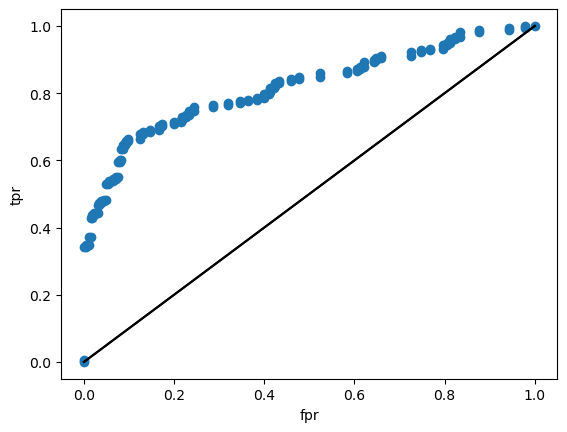

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, ts_proba)
plt.scatter(fpr,tpr)
plt.plot([[0,0],[1,1]],c='k')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [74]:
import pickle

In [75]:
from pickle import dump

In [76]:
file='log14.pkl'

In [77]:
pickle.dump(log_model,open(file,'wb'))